In [1]:
import numpy as np
import linreg 
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
data = pd.read_csv("USA_Housing.csv")

In [3]:
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


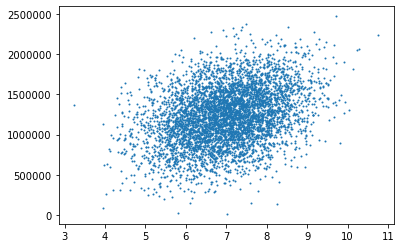

In [4]:
y = data.Price
X = data["Avg. Area Number of Rooms"]
plt.scatter(X, y, s=1)

In [5]:
model = linreg.Regressor(X, y, test_percent = 0.1)

In [6]:
Xtest, ytest = model.Xtest, model.ytest

In [7]:
y_est = model.predict(Xtest)
MSE = np.mean((ytest - y_est)**2)
MAE = np.mean(np.fabs(ytest - y_est))
print(f"MSE  = {MSE:.2e} over {len(y_est)} points")
print(f"MSE / VAR  = {MSE:.2e}/ {np.var(ytest):.2e} points")
print()
print(f"MAE  = {MAE:.2e} over {len(y_est)} points")
print(f"MAE / STDDEV = {MAE:.2e}/{np.std(ytest):.2e}")

MSE  = 1.14e+11 over 500 points
MSE / VAR  = 1.14e+11/ 1.26e+11 points

MAE  = 2.76e+05 over 500 points
MAE / STDDEV = 2.76e+05/3.54e+05


In [8]:
print(f"Chi2 = {model.chi2(ytest, y_est)} per {len(ytest)-model.M} DoF")

Chi2 = 455.12522178494385 per 499 DoF


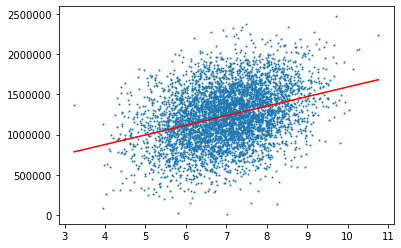

In [9]:
xplot = np.linspace(np.min(X), np.max(X), 50).reshape(50, 1)
yplot = model.predict(xplot)
plt.scatter(X, y, s=1)
plt.plot(xplot, yplot, c='r')

In [10]:
corr = model.correlation(X, y)
print(f"Pearson correlation = {corr}")

Pearson correlation = 0.3356644533667597


In [11]:
cov = np.cov(X, y)
w, v = np.linalg.eig(cov)
means = np.mean([X, y], 1)
print(means)
print(cov)

[6.98779185e+00 1.23207265e+06]
[[1.01170049e+00 1.19220442e+05]
 [1.19220442e+05 1.24692058e+11]]


In [12]:
for i, (p, e) in enumerate(zip(model.parameters, model.param_unc)):
    print(f"Parameter {i}: {p:.2f} +- {e:.2f}")

Parameter 0: 400934.70 +- 4500.00
Parameter 1: 119005.96 +- 223815.13
